In [5]:
import numpy as np

# Sampling time
T = 0.1

# Define system matrices for discretization
A = np.array([[1, T],
              [0, 1]])
B = np.array([[0],
              [T]])
C = np.array([[1, 0]])
B_w = np.array([[T, 0],
                [0, T]])
S_w = np.array([[1, 0],
                [0, 1]]) * T
S_v = np.array([[1]]) * T


# Display the discrete system matrices
print("Discrete-time system matrices:")
print("Ad:")
print(A)
print("Bd:")
print(B)
print("Cd:")
print(C)
print("Bwd:")
print(B_w)
print("S_w:")
print(S_w)
print("S_v:")
print(S_v)

Discrete-time system matrices:
Ad:
[[1.  0.1]
 [0.  1. ]]
Bd:
[[0. ]
 [0.1]]
Cd:
[[1 0]]
Bwd:
[[0.1 0. ]
 [0.  0.1]]
S_w:
[[0.1 0. ]
 [0.  0.1]]
S_v:
[[0.1]]


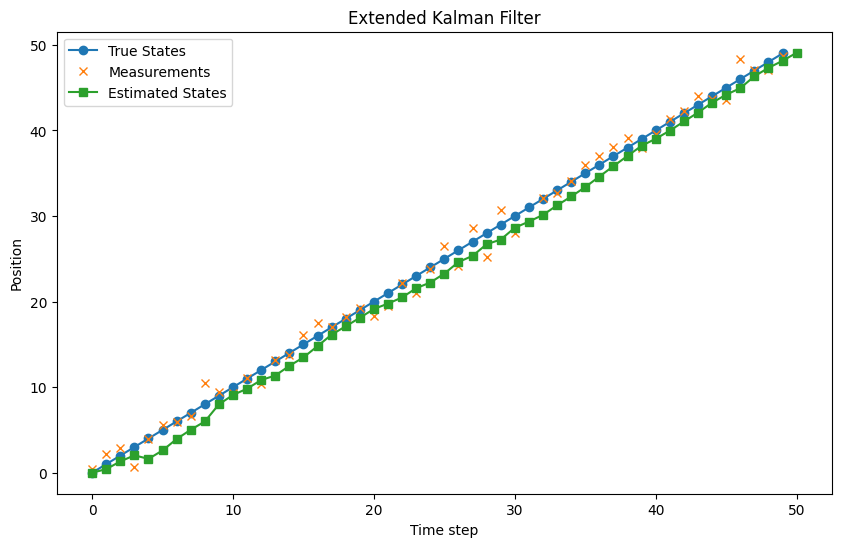

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def predict_state(A, B, u_k, B_w, w, x_k_minus_1, Sigma_k_minus_1):
    x_k_k_minus_1 = A @ x_k_minus_1 + B @ u_k + B_w @ w
    Sigma_k_k_minus_1 = A @ Sigma_k_minus_1 @ A.T + B_w @ S_w @ B_w.T
    return x_k_k_minus_1, Sigma_k_k_minus_1

def update_state(C, m_k, Sigma_k_k_minus_1, x_k_k_minus_1, x_k_minus_1, S_v):
    G_k = Sigma_k_k_minus_1 @ C.T @ np.linalg.inv(S_v + C @ Sigma_k_k_minus_1 @ C.T)
    x_k_k = x_k_k_minus_1 + G_k @ (m_k - C @ x_k_k_minus_1)
    Sigma_k_k = Sigma_k_k_minus_1 - G_k @ C @ Sigma_k_k_minus_1
    return x_k_k, Sigma_k_k

def discrete_kalman_filter(A, B, B_w, C, S_w, S_v, u_k, measurements):
    n = len(A)
    m = len(C[0])

    # Initialize state and covariance matrix
    x_hat = np.zeros(n)
    P = np.eye(n)

    # Lists to store the estimated states and covariances
    estimated_states = [x_hat]
    estimated_covariances = [P]

    for z in measurements:
        # Prediction step using the provided predict_state function
        x_hat_minus, P_minus = predict_state(A, B, u_k, B_w, np.zeros(len(B_w)), x_hat, P)

        # Update step using the provided update_state function
        x_hat, P = update_state(C, z, P_minus, x_hat_minus, x_hat, S_v)

        # Save estimated state and covariance
        estimated_states.append(x_hat)
        estimated_covariances.append(P)

    return np.array(estimated_states), np.array(estimated_covariances)

# Example usage
# Sampling time
T = 0.1

# Define system matrices for discretization
A = np.array([[1, T],
              [0, 1]])
B = np.array([[0],
              [T]])
C = np.array([[1, 0]])
B_w = np.array([[T, 0],
                [0, T]])
S_w = np.array([[1, 0],
                [0, 1]]) * T
S_v = np.array([[1]]) * T

u_k = np.array([0])

# Initial state and covariance
x0 = np.array([0, 0])
P0 = np.eye(2)

# Generate true states and noisy measurements
true_states = np.array([[i, 0.5 * i] for i in range(50)])
measurements = true_states[:, 0] + np.random.normal(0, 1, size=(50,))

# Run the Kalman filter
estimated_states, estimated_covariances = discrete_kalman_filter(A, B, B_w, C, S_w, S_v, u_k, measurements)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(true_states[:, 0], label='True States', marker='o')
plt.plot(measurements, label='Measurements', marker='x', linestyle='None')
plt.plot(estimated_states[:, 0], label='Estimated States', marker='s')
plt.title('Extended Kalman Filter')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.legend()
plt.show()


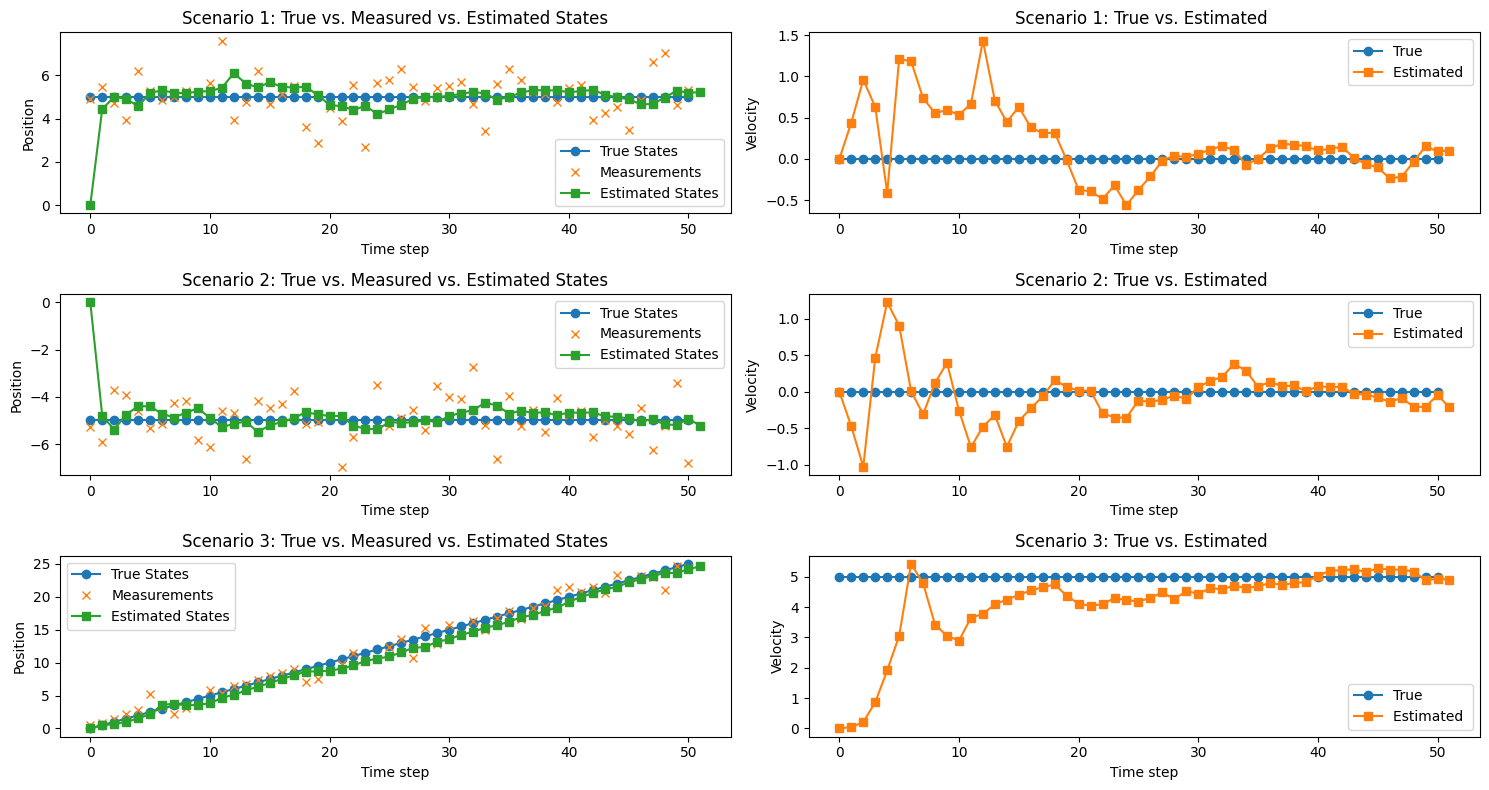

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def predict_state(A, B, u_k, B_w, w, x_k_minus_1, Sigma_k_minus_1):
    x_k_k_minus_1 = A @ x_k_minus_1 + B @ u_k + B_w @ w
    Sigma_k_k_minus_1 = A @ Sigma_k_minus_1 @ A.T + B_w @ S_w @ B_w.T
    return x_k_k_minus_1, Sigma_k_k_minus_1

def update_state(C, m_k, Sigma_k_k_minus_1, x_k_k_minus_1, x_k_minus_1, S_v):
    G_k = Sigma_k_k_minus_1 @ C.T @ np.linalg.inv(S_v + C @ Sigma_k_k_minus_1 @ C.T)
    x_k_k = x_k_k_minus_1 + G_k @ (m_k - C @ x_k_k_minus_1)
    Sigma_k_k = Sigma_k_k_minus_1 - G_k @ C @ Sigma_k_k_minus_1
    return x_k_k, Sigma_k_k

def simulate_system(A, B, u_k, B_w, w, x0, T):
    n = len(x0)
    states = [x0]
    for _ in range(T):
        x0, _ = predict_state(A, B, u_k, B_w, w, x0, np.eye(n))
        states.append(x0)
    return np.array(states)

# Example usage
# Sampling time
T = 0.1

# Define system matrices for discretization
A = np.array([[1, T],
              [0, 1]])
B = np.array([[0],
              [T]])
C = np.array([[1, 0]])
B_w = np.array([[T, 0],
                [0, T]])
S_w = np.array([[1, 0],
                [0, 1]]) * T
S_v = np.array([[1]]) * T

# Control input
u_k = np.array([0])

# Number of time steps
num_steps = 50

# Initial conditions for three scenarios
initial_conditions = [np.array([5, 0]), np.array([-5, 0]), np.array([0, 5])]

# Plot the results for each initial condition
plt.figure(figsize=(15, 8))
for i, x0 in enumerate(initial_conditions):
    # Simulate the dynamic system
    true_states = simulate_system(A, B, u_k, B_w, np.zeros(len(B_w)), x0, num_steps)

    # Generate noisy measurements
    measurements = true_states[:, 0] + np.random.normal(0, 1, size=(num_steps+1,))

    # Run the Kalman filter
    estimated_states, _ = discrete_kalman_filter(A, B, B_w, C, S_w, S_v, u_k, measurements)

    # Plot the results
    plt.subplot(3, 2, i*2+1)
    plt.plot(true_states[:, 0], label='True States', marker='o')
    plt.plot(measurements, label='Measurements', marker='x', linestyle='None')
    plt.plot(estimated_states[:, 0], label='Estimated States', marker='s')
    plt.title(f'Scenario {i+1}: True vs. Measured vs. Estimated States')
    plt.xlabel('Time step')
    plt.ylabel('Position')
    plt.legend()

    plt.subplot(3, 2, i*2+2)
    plt.plot(true_states[:, 1], label='True ', marker='o')
    plt.plot(estimated_states[:, 1], label='Estimated ', marker='s')
    plt.title(f'Scenario {i+1}: True vs. Estimated ')
    plt.xlabel('Time step')
    plt.ylabel('Velocity')
    plt.legend()

plt.tight_layout()
plt.show()
